<a href="https://colab.research.google.com/github/OndwelaT/OndwelaT.github.io/blob/main/Evaluation_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:


import pandas as pd

# Load the Excel file
df = pd.read_excel('/content/combined_sentiment_data.xlsx')

# Print the column names
print(df.columns)



Index(['actual', 'zero shot', 'few shot', 'Contexual', 'instruction'], dtype='object')


In [4]:
# prompt: correct spelling for text under actual
!pip install pyspellchecker

import pandas as pd
from spellchecker import SpellChecker

# Load the Excel file
df = pd.read_excel('/content/combined_sentiment_data.xlsx')

# Initialize the spell checker
spell = SpellChecker()

# Correct spelling for the 'actual' column
df['actual'] = df['actual'].apply(lambda text: ' '.join([spell.correction(word) for word in text.split()]))

# Save the DataFrame with corrected spelling
df.to_excel('combined_sentiment_data_corrected.xlsx', index=False)
# Print the updated DataFrame
print(df)


       actual  zero shot   few shot  Contexual instruction
0     NEUTRAL   Positive   NEGATIVE   Negative    Negative
1    POSITIVE   Negative   NEGATIVE   Negative    Negative
2    NEGATIVE   Negative   POSITIVE   Negative    Negative
3    NEGATIVE   Negative   NEGATIVE    Neutral     Neutral
4    POSITIVE    Neutral   NEGATIVE   Positive    Negative
..        ...        ...        ...        ...         ...
385  NEGATIVE   Negative   NEGATIVE   Negative     Neutral
386  POSITIVE   Positive   POSITIVE   Positive    Negative
387  NEGATIVE   Negative   NEGATIVE   Positive     Neutral
388  POSITIVE    Neutral   POSITIVE    Neutral    Positive
389  POSITIVE   Positive   POSITIVE   Positive     Neutral

[390 rows x 5 columns]


In [5]:
import pandas as pd

# Load the Excel file
df = pd.read_excel('/content/combined_sentiment_data_corrected.xlsx')

# Convert column names to lowercase
df.columns = [x.lower() for x in df.columns]

# Convert text in all columns to lowercase
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].str.lower()

# Drop the specified columns
df = df.drop(['zero shot', 'contexual', 'instruction'], axis=1)
df.to_excel('my_dataframe.xlsx', index=False)
# Print the head of the DataFrame to verify the changes
print(df.head())

     actual   few shot
0   neutral   negative
1  positive   negative
2  negative   positive
3  negative   negative
4  positive   negative


In [6]:
import pandas as pd

# Load the Excel file
df = pd.read_excel('/content/my_dataframe.xlsx')

# Define the sentiment mapping
sentiment_mapping = {
    'positive': 1,
    'negative': -1,
    'neutral': 0
}

# Map sentiments for 'actual' column
df['actual_sentiment'] = df['actual'].map(sentiment_mapping)

# Convert 'contexual' column to lowercase and strip whitespace:
df['few shot'] = df['few shot'].str.lower().str.strip() # Corrected indentation

# Map sentiments for 'contexual' column
df['few shot_sentiment'] = df['few shot'].map(sentiment_mapping)

drop_columns = ['actual', 'few shot']
df = df.drop(drop_columns, axis=1)
# Save the DataFrame as 'data'
data = df
print(df.head())

# save the DataFrame to a new Excel file if needed
data.to_excel('dataframe_with_mapped_sentiments.xlsx', index=False)

   actual_sentiment  few shot_sentiment
0                 0                  -1
1                 1                  -1
2                -1                   1
3                -1                  -1
4                 1                  -1


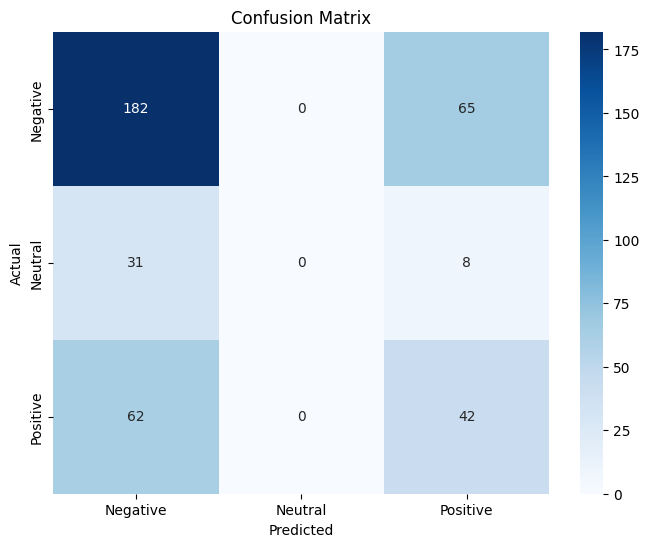

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


Accuracy: 0.5743589743589743
Precision: 0.5165428194993412
Recall: 0.5743589743589743
F1 Score: 0.5439178432092934


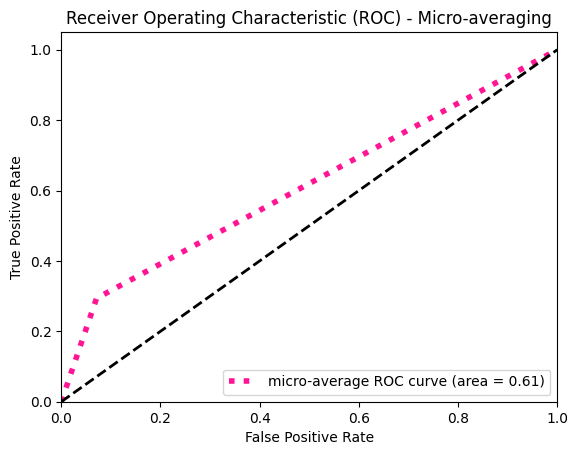

ROC AUC (Micro-average): 0.6113127378950164


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Load the DataFrame
df = pd.read_excel('/content/dataframe_with_mapped_sentiments.xlsx')

# Extract true labels and predicted labels
y_true = df['actual_sentiment']
y_pred = df['few shot_sentiment']

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# ROC Curve using micro-averaging for multiclass

# Binarize the output
n_classes = len(df['actual_sentiment'].unique()) # Define n_classes
y_true_bin = label_binarize(y_true, classes=range(n_classes))
y_pred_bin = label_binarize(y_pred, classes=range(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_pred_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# Plot ROC curve for micro-averaging
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Micro-averaging')
plt.legend(loc="lower right")
plt.show()

print(f"ROC AUC (Micro-average): {roc_auc['micro']}")

In [9]:
plt.savefig('roc_curve.png')

<Figure size 640x480 with 0 Axes>